In [1]:
from keras.preprocessing import image
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.applications.inception_resnet_v2 import preprocess_input,decode_predictions
import numpy as np

Using TensorFlow backend.


In [2]:
model = InceptionResNetV2(weights='imagenet', include_top=False, classes=1000)
model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, None, None, 3 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, None, None, 3 0           batch_normalization_1[0][0]      
________________________________________________________________________________

In [3]:
import glob
files_list = glob.glob("../images/testset1/*.png")

In [4]:
len(files_list)

100

In [5]:
feature_list = list()
for i in files_list:
    img_path = i
    img = image.load_img(img_path, target_size=(299, 299))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    preds_features = np.array(model.predict(img_data))
    feature_list.append(preds_features.flatten())

In [6]:
feature_list_np = np.array(feature_list)

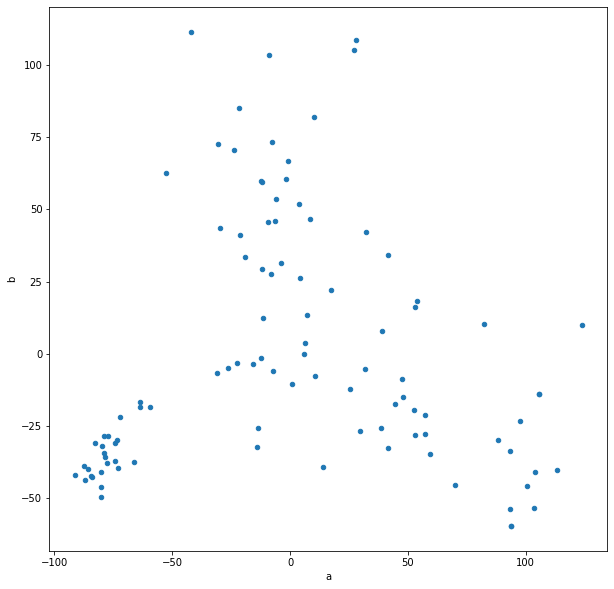

In [8]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns;
%matplotlib inline
df = pd.DataFrame(feature_list)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df)
df_pca = pd.DataFrame(principalComponents,columns=["a","b"])
df_pca.plot.scatter("a","b",figsize=(10,10))

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,20
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

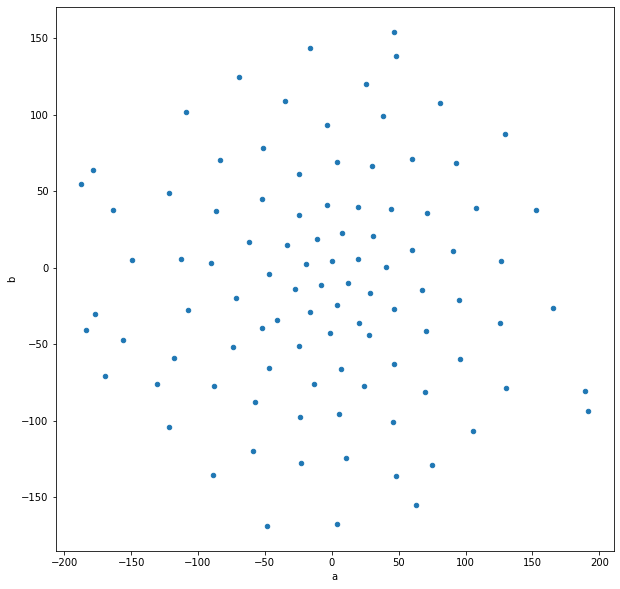

In [31]:
from sklearn.manifold import TSNE
df = pd.DataFrame(feature_list)

X_embedded = TSNE(n_components=2).fit_transform(df)
df_tsne = pd.DataFrame(X_embedded,columns=["a","b"])
df_tsne.plot.scatter("a","b",figsize=(10,10))



In [32]:
colors = ['royalblue', 'maroon', 'forestgreen', 'mediumorchid', 'tan', 'deeppink', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

# X = df_pca.values.copy()
X = df_tsne.values.copy()
kmeans = KMeans(n_clusters=2, random_state=0).fit(feature_list_np)
clusters = kmeans.labels_

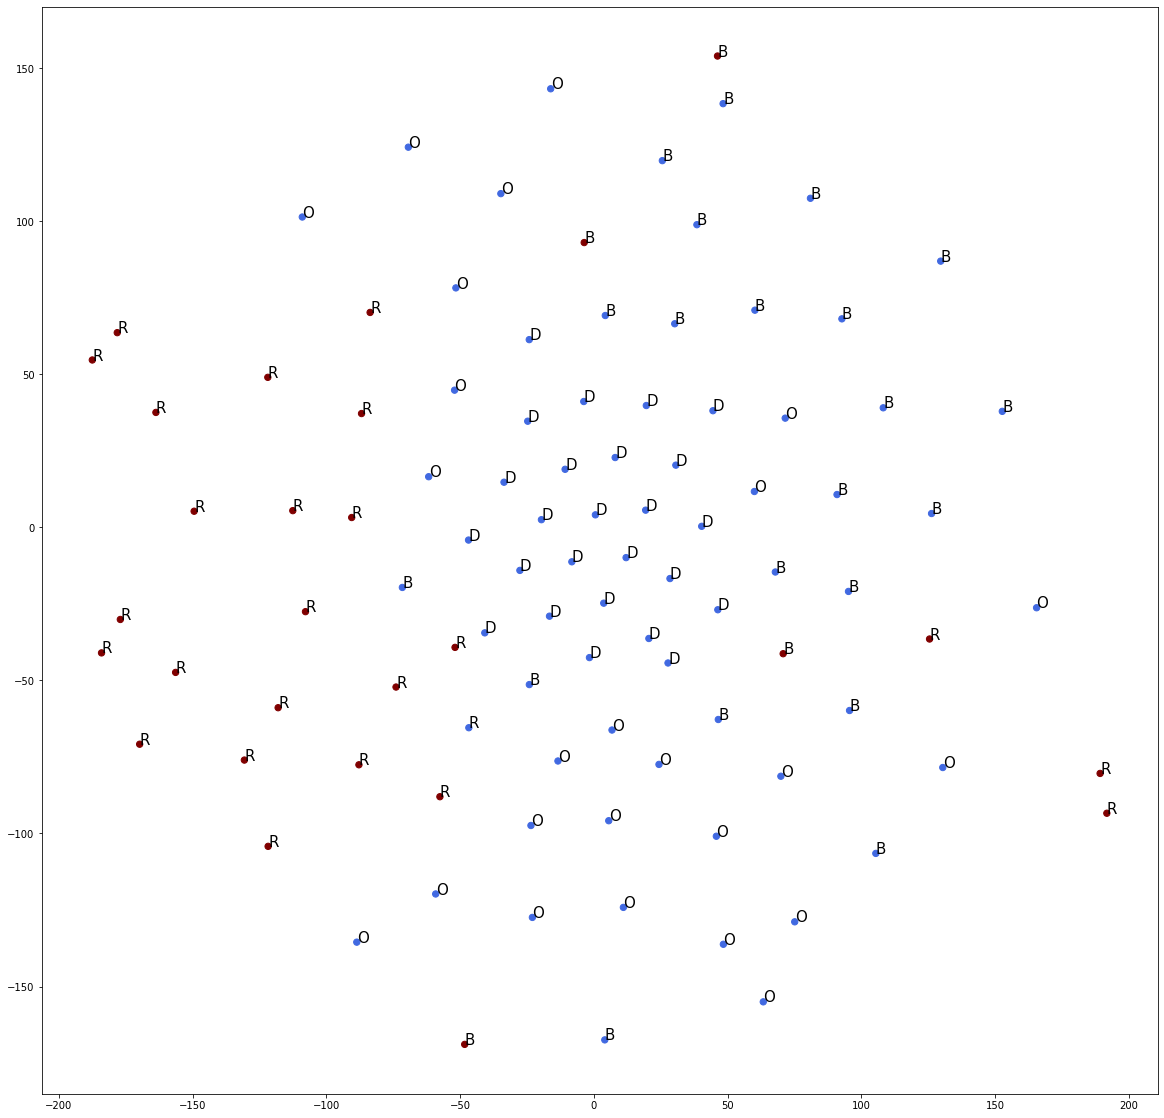

In [33]:
plt.scatter(X[:,0], X[:,1], c=vectorizer(clusters),s=40)

for i in range(X.shape[0]):
    if (i<25):
        k = "B"
    elif ((i>=20) & (i<50)):
        k = "D"
    elif ((i>=50) & (i<75)):
        k = "O"
    else:
        k = "R"
        
    plt.text(X[i,0], X[i,1], str(k),size=15)

plt.show()

In [27]:
for i,j in enumerate(zip(files_list,kmeans.labels_)):
    print(i,j)

0 ('../images/testset1\\break (1).png', 0)
1 ('../images/testset1\\break (10).png', 0)
2 ('../images/testset1\\break (11).png', 0)
3 ('../images/testset1\\break (12).png', 0)
4 ('../images/testset1\\break (13).png', 0)
5 ('../images/testset1\\break (14).png', 0)
6 ('../images/testset1\\break (15).png', 0)
7 ('../images/testset1\\break (16).png', 0)
8 ('../images/testset1\\break (17).png', 0)
9 ('../images/testset1\\break (18).png', 0)
10 ('../images/testset1\\break (19).png', 0)
11 ('../images/testset1\\break (2).png', 0)
12 ('../images/testset1\\break (20).png', 1)
13 ('../images/testset1\\break (21).png', 0)
14 ('../images/testset1\\break (22).png', 0)
15 ('../images/testset1\\break (23).png', 0)
16 ('../images/testset1\\break (24).png', 0)
17 ('../images/testset1\\break (25).png', 1)
18 ('../images/testset1\\break (3).png', 0)
19 ('../images/testset1\\break (4).png', 1)
20 ('../images/testset1\\break (5).png', 0)
21 ('../images/testset1\\break (6).png', 1)
22 ('../images/testset1\\b